# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [4]:
install.packages("mclust")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
library(mclust)
library(cluster)
library(ggplot2)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("./milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [11]:
help(Mclust)

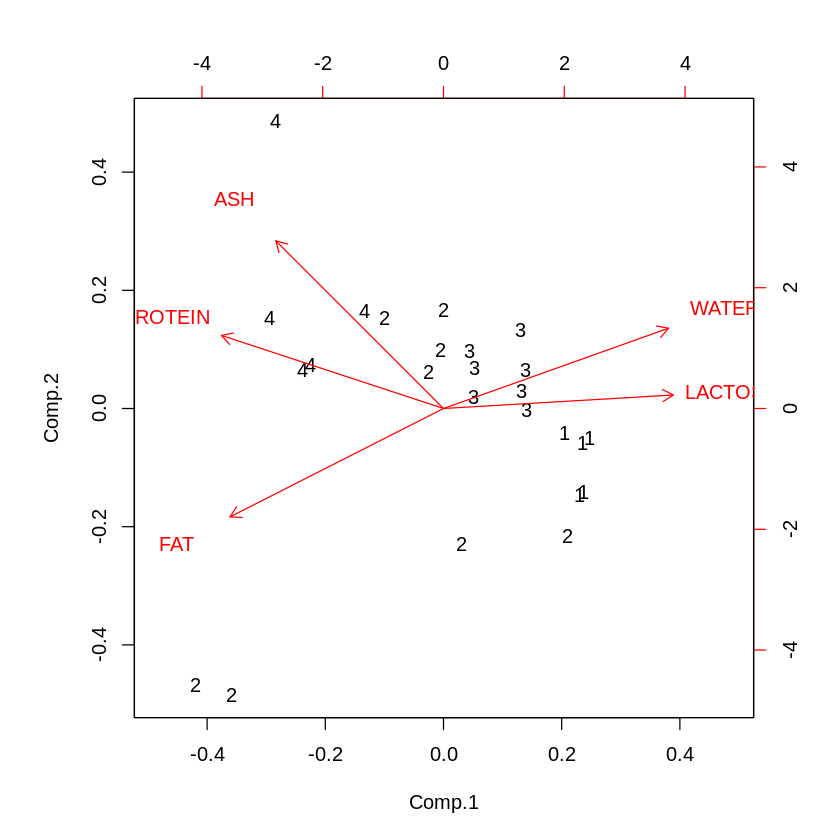

In [62]:
biplot(res,xlabs=clus$classification)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

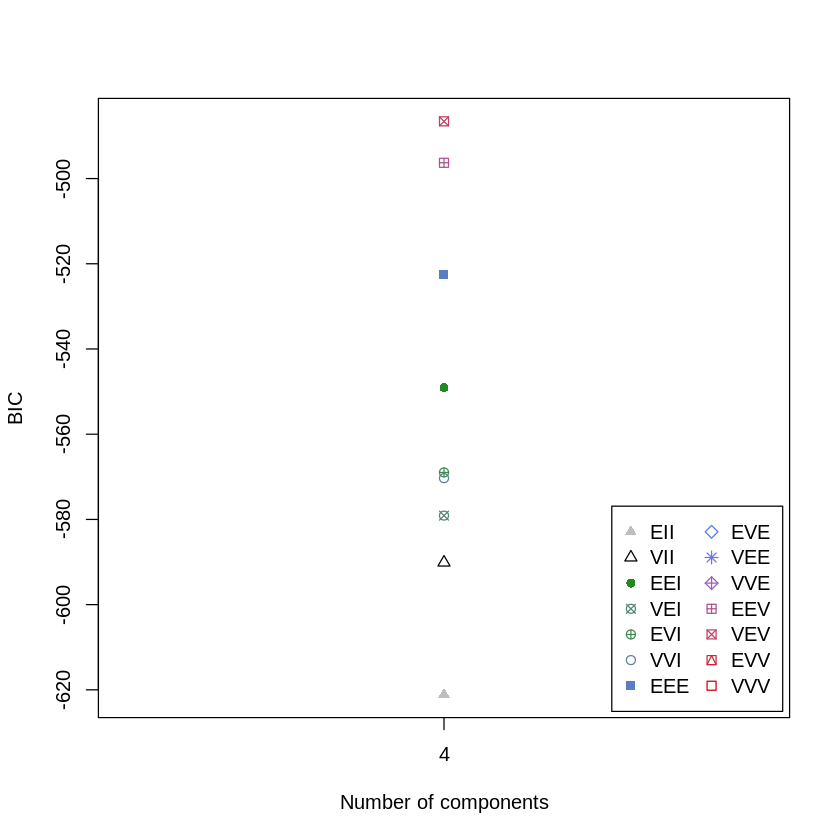

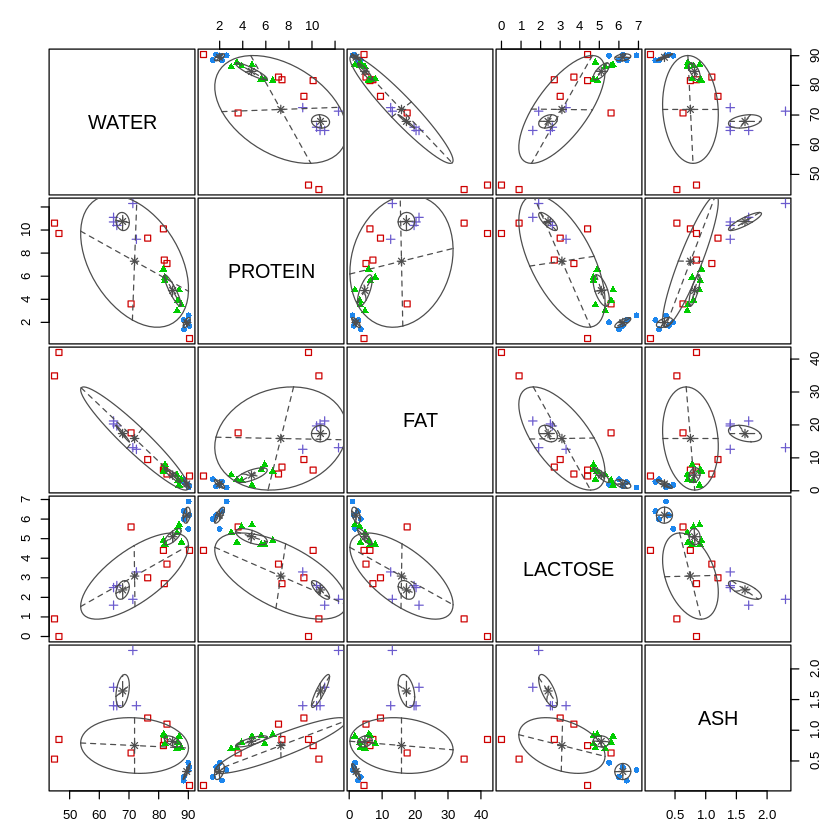

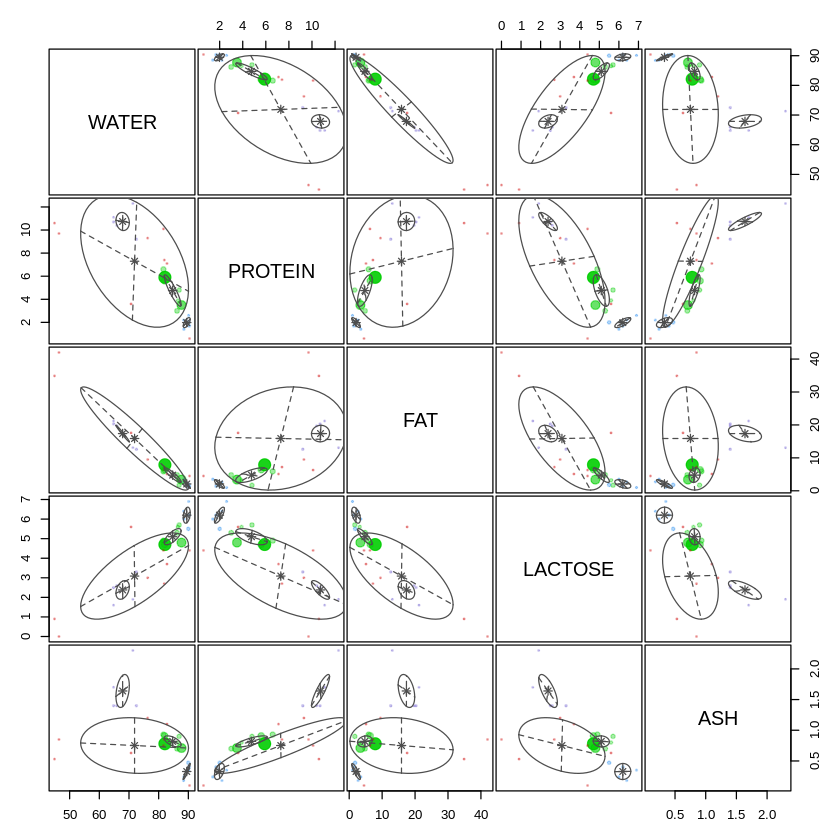

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER    PROTEIN   FAT       LACTOSE  ASH      
[1,] 89.45999  1.980001  2.080005 6.200009 0.3279979
[2,] 71.88271  7.298580 15.881214 3.088610 0.7512686
[3,] 84.71493  4.756873  4.756149 5.100211 0.8185953
[4,] 67.86000 10.740002 17.380003 2.379999 1.6400005

HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

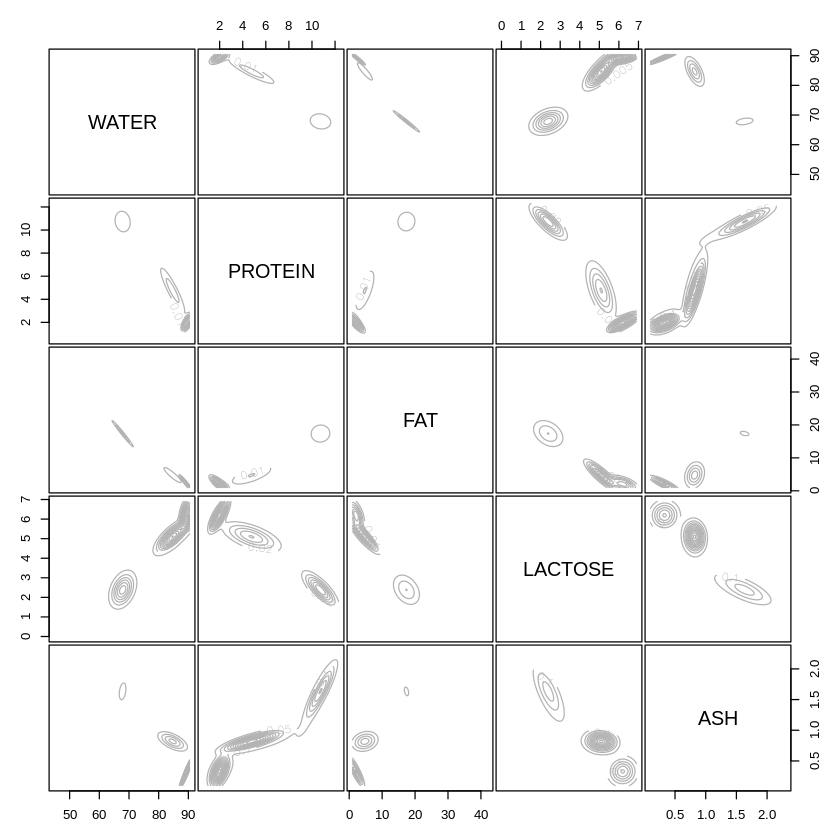

In [61]:
clus <-Mclust(datos,4)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



In [14]:
help(Mclust)

Ejercicio 1: 

a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
        
Respuesta:

El método ```Mclust()```, recibe en sus parametros la data, y la cantidad de grupos que yo necesito, en su version por defecto se basa en el criterio de informacion bayesiana para encontrar la mezcla de gausianas que mejor agrupe los datos.

La salida de esta funcion esta compuesta por gráficos que muestran justamente el BIC obtenido tras realizar la clusterizacion para diferentes modelos a ajustar en la fase de EM, si la relacion entre la cantidad de los datos y la dimension de las caracteristicas lo permite, n_datos > n_dim, se probaran todos los modelos disponibles en ```mclust.options("emModelNames")```, en caso de que sea n_datos <= n_dim, se probaran solo c("EII", "VII", "EEI", "EVI", "VEI", "VVI"), y en caso de ser data de una sola variable, solo se utilizarán c("E", "V") celda de abajo para ver los modelos.
Tambien se obtienen graficos de las gausianas para diferentes pares de las caracteristicas, se obtiene cual es el mejor modelo de acuerdo a lo pedido, etc.
    
    
b) Interprete y comente los resultados obtenidos. 

vemos que el mejor resultado se obtiene para el modelo de "ellipsoidal, equal shape" con su codigo VEV, y que la cantidad de datos que pertenece a cada uno de los cluster es similar, tienen sentido los grupos.

In [15]:
#correr esta celda para ver los modelos utilizados en el ajuste en la fase de EM
help(mclustModelNames)

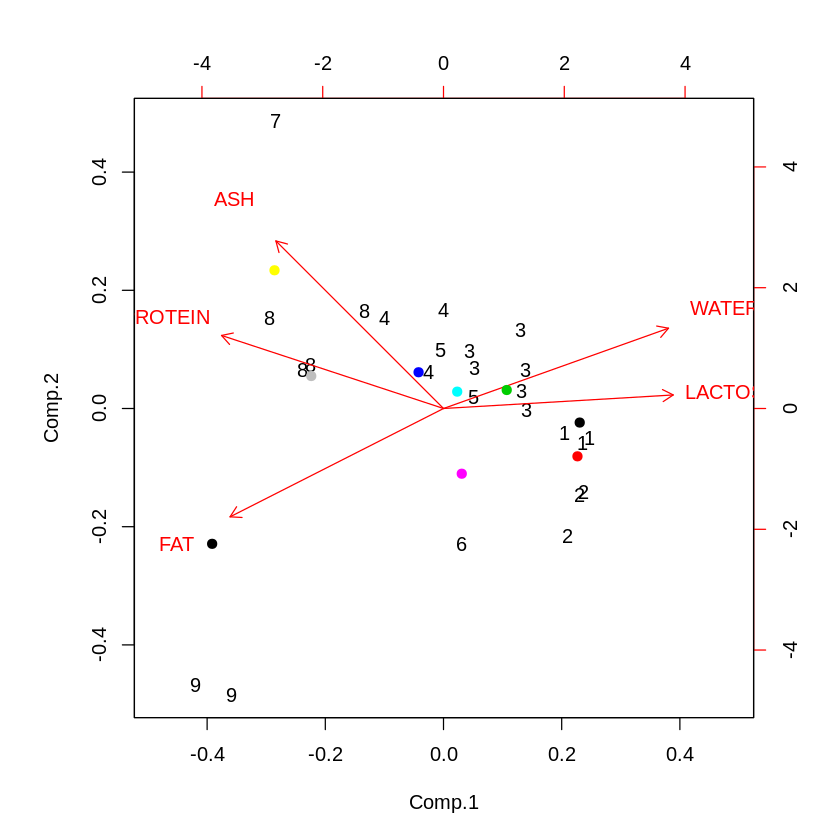

In [55]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

Ejercicio 2: 

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

para la cantidad de grupos mostrada, considerando que sin definir la cantidad de grupos se utiliza el vector por defecto 1:9, se obtiene que el modelo que obtiene el mejor valor para BIC es el, ellipsoidal con igual volumen y shape con 9 variables, pero como es recomendable tomar el primer maximo local, el optimo de grupos seria 3 en este caso. 


b) Discuta y compare  sus resultados con aquellos obtenidos con k-means


similares a los obtenidos en k-means en el sentido que se obtiene un total de 3 grupos

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

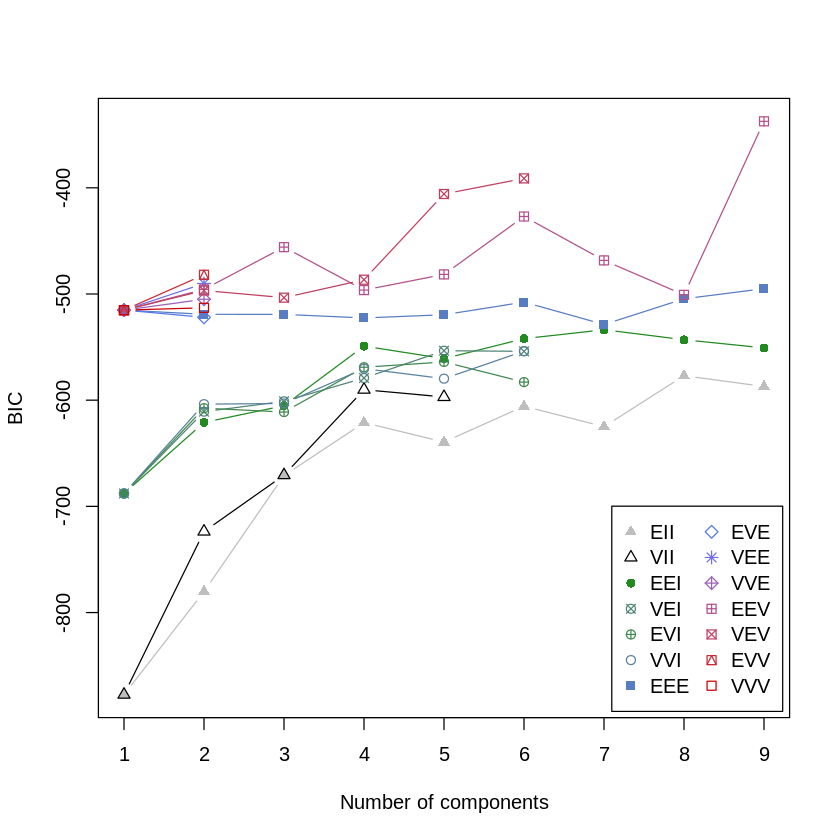

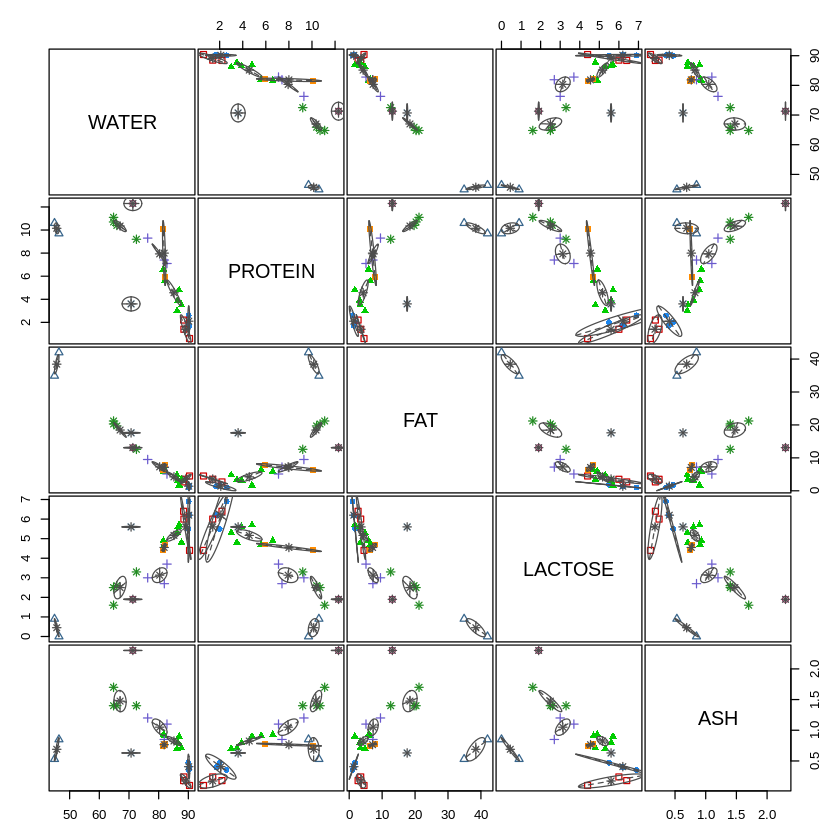

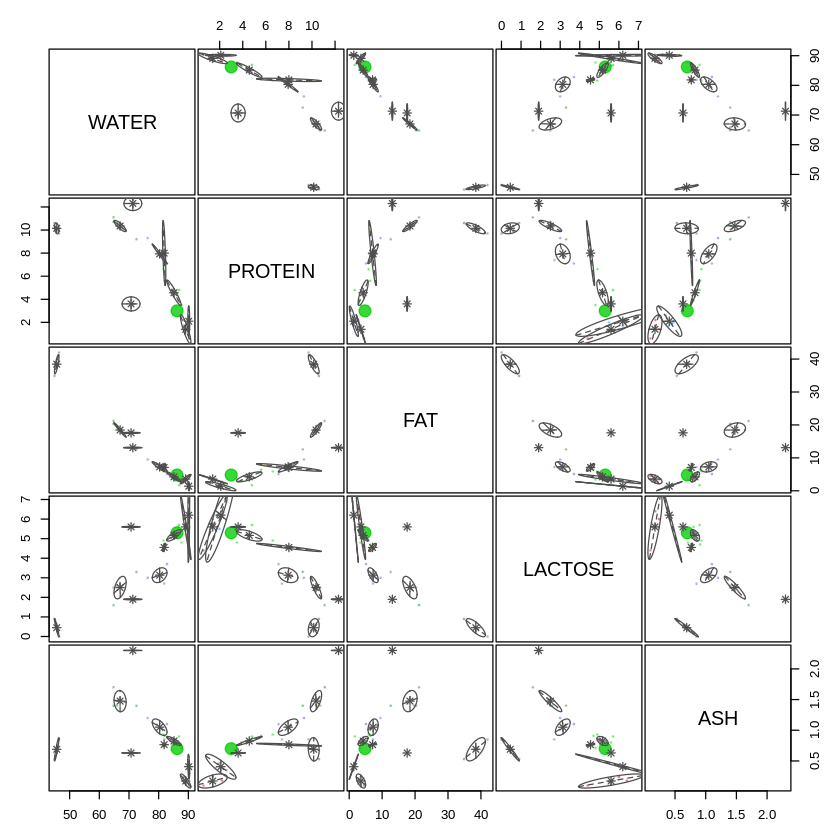

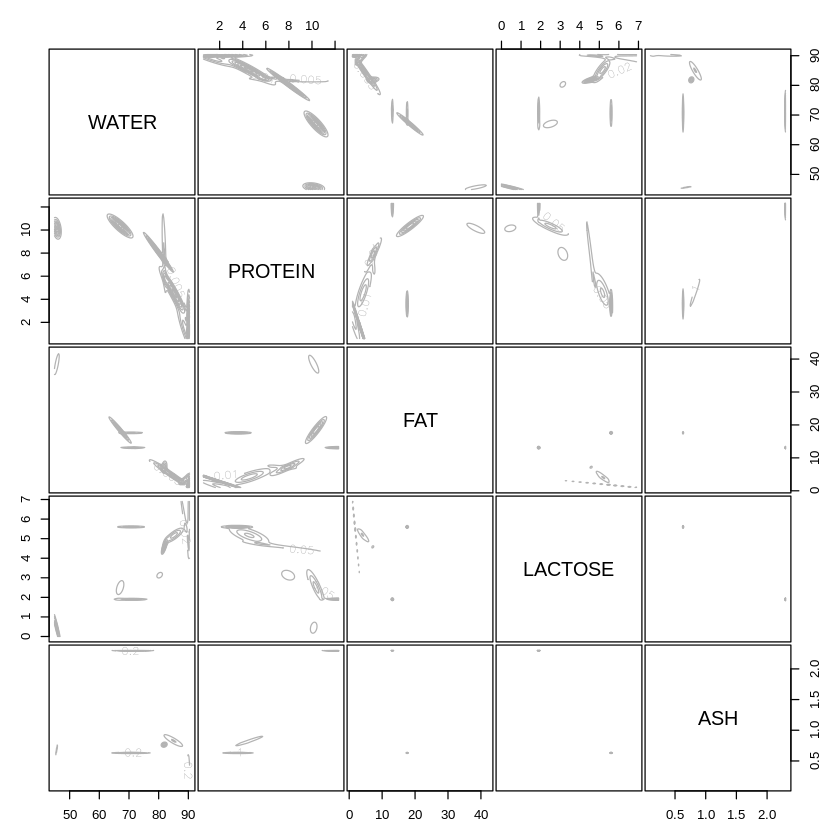

In [59]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
#clus



En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

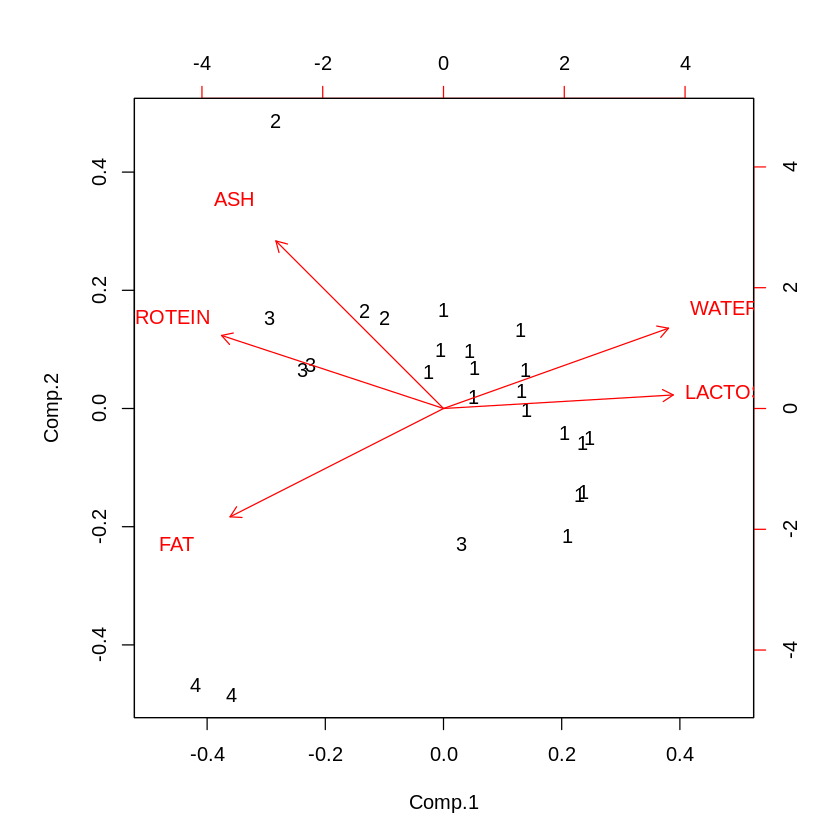

In [64]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

In [57]:
help(hclust)

Ejercicio 3: 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

La funcion ```hclust()``` crea custerizacion jerarquica a partir de la matriz de disimilaridad de todas las observaciones con todas las observaciones, esta matriz se obtiene aplicando la funcion ```dist()``` a los datos y como salida se tiene el arbol de clusterizacion para los datos con todos los niveles, por eso si queremos graficar para una cantidad de grupos en especifico se utiliza la funcion ```cutree(res3,4)``` que justamente eso es lo que hace, corta el arbol para que queden 4 grupos

b) Interprete y comente los resultados obtenidos. 

tienen sentido los grupos obtenidos, es interesante conocer esta herramienta que permite mantener una consistencia en los grupos al variar la cantidad de estos, y no se reorganizan totalmente de nuevo por cada n diferente.


c) Utilice otros parámetros en hclust y discuta como varían los resultados.

Hace bastante sentido los grupos que se obtienen al poner 3 por ejemplo para seguir probando con 3 como cantidad de grupos y sorprende lo bien consolidado del grupo de dos que aparece de nuevo en el agrupamiento jerarquico, los que tienen harta grasa en su leche y poca agua, al igual que se veia en kmeans

Ejercicio 4: 

a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [22]:
datos2<-read.table("./iris.csv",dec=",",sep=";",header=TRUE)
summary(datos2)
clases_originales <- datos2$variety
datos2$variety <- NULL

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

#### Gráfico de la data original

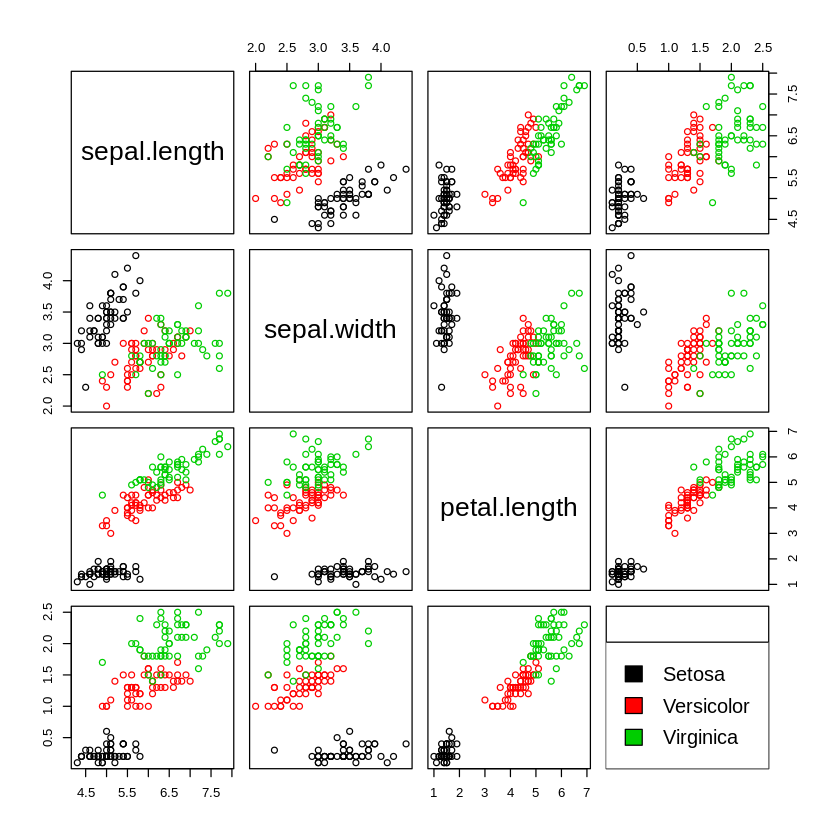

In [80]:
pairs(datos2,col=clases_originales)
legend("bottomright", inset=.044, fill = unique(clases_originales), legend = c( levels(clases_originales)))

## KMeans

In [ ]:
#kmeans
 
grupos=3
cl<-kmeans(datos2,grupos,iter.max=1000,nstart=10)

In [98]:
#conversion para la clusterizacion de kmeans con 4 grupos 
KM <- data.frame("K-Means" = cl$cluster, 
                  stringsAsFactors=FALSE)

level_vec <- c(1,2,3) ## esta asignacion es a mano en base a observacion de comparacion con la data original 
replacement_vec <- c("Versicolor","Virginica","Setosa")
KM[] <- lapply(KM, function(x) forcats::lvls_revalue(factor(x, levels = level_vec), 
                                                       replacement_vec))

In [95]:
# GMM

clus_GMM <-Mclust(datos2,3)

GMM <- data.frame("GMM" = clus_GMM$classification, 
                  stringsAsFactors=FALSE)

level_vec <- c(1,2,3) ## esta asignacion es a mano en base a observacion de comparacion con la data original para obtener la mejor presicion 
replacement_vec <- c("Setosa","Versicolor","Virginica")
GMM[] <- lapply(GMM, function(x) forcats::lvls_revalue(factor(x, levels = level_vec), 
                                                       replacement_vec))

In [97]:
jerarquica <- hclust(dist(datos2))
#cutree(jerarquica,3)

HC <- data.frame("Hierarchical" = cutree(jerarquica,3), 
                  stringsAsFactors=FALSE)

level_vec <- c(1,2,3) ## esta asignacion es a mano en base a observacion de comparacion con la data original para obtener la mejor presicion 
replacement_vec <- c("Setosa","Virginica" ,"Versicolor")
HC[] <- lapply(HC, function(x) forcats::lvls_revalue(factor(x, levels = level_vec), 
                                                       replacement_vec))

In [109]:
print(data.frame(clases_originales,KM,GMM,HC))

    clases_originales    K.Means        GMM Hierarchical
1              Setosa     Setosa     Setosa       Setosa
2              Setosa     Setosa     Setosa       Setosa
3              Setosa     Setosa     Setosa       Setosa
4              Setosa     Setosa     Setosa       Setosa
5              Setosa     Setosa     Setosa       Setosa
6              Setosa     Setosa     Setosa       Setosa
7              Setosa     Setosa     Setosa       Setosa
8              Setosa     Setosa     Setosa       Setosa
9              Setosa     Setosa     Setosa       Setosa
10             Setosa     Setosa     Setosa       Setosa
11             Setosa     Setosa     Setosa       Setosa
12             Setosa     Setosa     Setosa       Setosa
13             Setosa     Setosa     Setosa       Setosa
14             Setosa     Setosa     Setosa       Setosa
15             Setosa     Setosa     Setosa       Setosa
16             Setosa     Setosa     Setosa       Setosa
17             Setosa     Setos

los resultados son bastantes interesantes, se puede observar situaciones como las siguientes:

- kmeans es malo para identificar el grupo virginica
- Jerarquico es malo en identificar las versicolor
- El mejor modelo para clasificar en esta oportunidad fue el GMM
